# SCA-7216 Devoir 1B - Statistiques Bayesiennes
3. Continuez l'exemple 3.4, mais maintenant adjoutez une erreur brute à l'erreur d'observation, une erreur qui suit une densité de probabilité uniforme $U$ sur l'ensemble du domaine.

In [1]:
# Auteur Devon Gulley
# Mise à jour 2025-01-23
# Suite la solution donné par Exemple 3.4

# Importer des outils
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import simpson as simps_int

# Initialiser les variables:
var_O = 0.5            # Variance d'observation 
var_F = 1.0            # Varieance antérieure
x_f = 0.               # Moyenne antérieure
y = [0, 1.9, 2.8, 3.7] # valeures d'observation

In [2]:
# Configurer le PDF 

# Définir le domaine de la variable x de -20 à +20 en 1001 points
x_min = -20.  
x_max = 20.
steps = 1001
x = np.linspace(x_min,x_max,steps) 

# Calculer la taille de pas dx en fonction de la discrétisation de x 
dx = ( x_max - x_min ) / steps

In [3]:
# Trouver la vraisemblance pour chaque y_o(k)
py_o = [ stats.norm.pdf(x, y_o ,var_O**0.5) for y_o in y ] 

# La distribution antérieure
px_b = stats.norm.pdf(x, x_f, var_F**0.5)

In [4]:
# Adjouter une erreur brute qui suit une densité de probabilité uniforme partout le domaine 
U = np.ones(len(x)) / (x_max - x_min)

alpha = 0.2

# Ajouter cette erreur à l'erreur d'observation à distribution normale
pyg_o = [(1-alpha) * py_ok + alpha*U for py_ok in py_o] 

In [5]:
# Allouer mémoire pour les distributions postérieure
px_a = [np.zeros(len(py_ok)) for py_ok in py_o]
pxg_a = [np.zeros(len(pyg_ok)) for pyg_ok in pyg_o]


for k in range(len(y)):
    # Chaque distribution postérieure non-normailisée
    px_a[k] = np.multiply(py_o[k],px_b)
    pxg_a[k]= np.multiply(pyg_o[k],px_b)
    
    # Calculer la constante de normalisation (ici par la règle de Simpson)
    A_k = simps_int(px_a[k],dx = dx)
    Ag_k = simps_int(pxg_a[k],dx = dx)

    # Normaliser px_a[k] par A_k
    px_a[k] = px_a[k]/A_k
    pxg_a[k] = pxg_a[k]/Ag_k

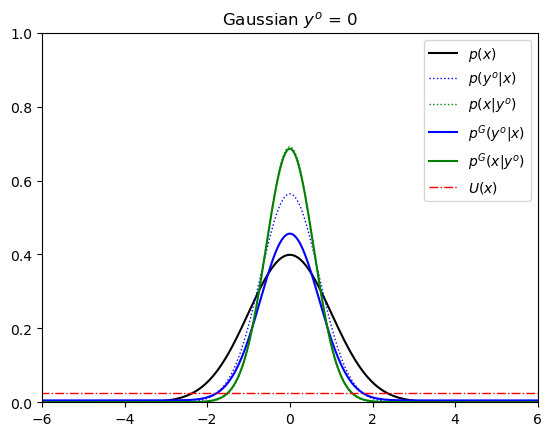

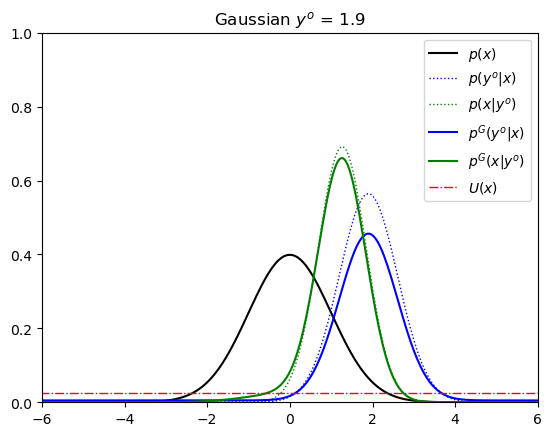

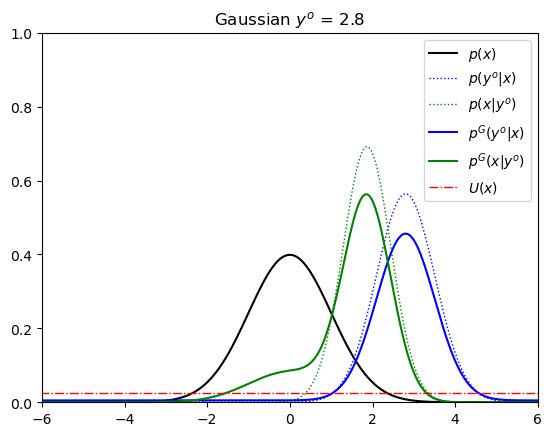

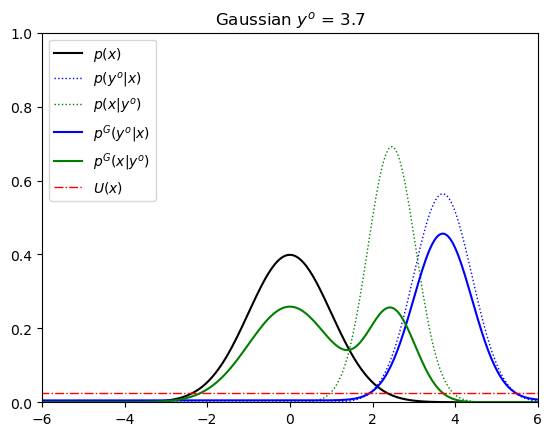

In [6]:
# Créer les graphiques
for k in range(len(y)):
    plt.figure()

    # Les trois courbes comme l'exemple 3.4
    plt.plot(x,px_b, label = '$p(x)$',color = 'black',linestyle = 'solid')
    
    plt.plot(x,py_o[k],label = '$p(y^o|x)$',color = 'blue',linestyle = 'dotted',linewidth=1)
    plt.plot(x,px_a[k],label = '$p(x|y^o)$',color = 'green',linestyle = 'dotted',linewidth=1)
    
    plt.plot(x,pyg_o[k],label = '$p^G(y^o|x)$',color = 'blue',linestyle = 'solid')
    plt.plot(x,pxg_a[k],label = '$p^G(x|y^o)$',color = 'green',linestyle = 'solid')
    
    plt.plot(x,U,label = '$U(x)$', color = 'red', linestyle='dashdot',linewidth=1)
    
    plt.title(f'Gaussian $y^o$ = {y[k]}')
    plt.xlim(-6,6)
    plt.ylim(0,1)
    
    plt.legend()
    plt.show()



In [7]:
# Vérifier normalité 
for k in range(len(y)):
    print(f'For k = {k}, across the domain [{x_min},{x_max}]')
    print(f'p^G(x|y^o) normalises to {simps_int(pxg_a[k],dx=dx)}')
    print()

For k = 0, across the domain [-20.0,20.0]
p^G(x|y^o) normalises to 1.0000000000000002

For k = 1, across the domain [-20.0,20.0]
p^G(x|y^o) normalises to 1.0

For k = 2, across the domain [-20.0,20.0]
p^G(x|y^o) normalises to 1.0

For k = 3, across the domain [-20.0,20.0]
p^G(x|y^o) normalises to 1.0

